### Decision Tree Algorithm in Machine Learning
A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It works by splitting the dataset into subsets based on the most significant feature for prediction at each level, creating a tree-like structure.

### How It Works


### Key Metrics for Splitting
#### For Classification:
 . Gini Impurity
 . Entropy (Information Gain)
#### For Regression:
 . Mean Squared Error (MSE)
 . Mean Absolute Error (MAE)


### classification with descision tree aslgorithm

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Sample dataset
data = {
    'Age': [25, 30, 45, 35, 40],
    'Income': ['Low', 'Medium', 'High', 'Medium', 'Low'],
    'Student': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'Buy': ['No', 'No', 'Yes', 'Yes', 'Yes']
}
df=pd.DataFrame(data)
df

,Age,Income,Student,Buy
0,25,Low,No,No
1,30,Medium,Yes,No
2,45,High,Yes,Yes
3,35,Medium,No,Yes
4,40,Low,Yes,Yes


In [22]:
# let'e encoded categorical variables with pandas 
encoded_df=pd.get_dummies(df,drop_first=True)
encoded_df


,Age,Income_Low,Income_Medium,Student_Yes,Buy_Yes
0,25,True,False,False,False
1,30,False,True,True,False
2,45,False,False,True,True
3,35,False,True,False,True
4,40,True,False,True,True


In [26]:
# features and target variables
X=encoded_df.drop("Buy_Yes",axis=1)
y=encoded_df['Buy_Yes']

In [28]:
# split  the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=43)


In [32]:
# create model and train the data
model=DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

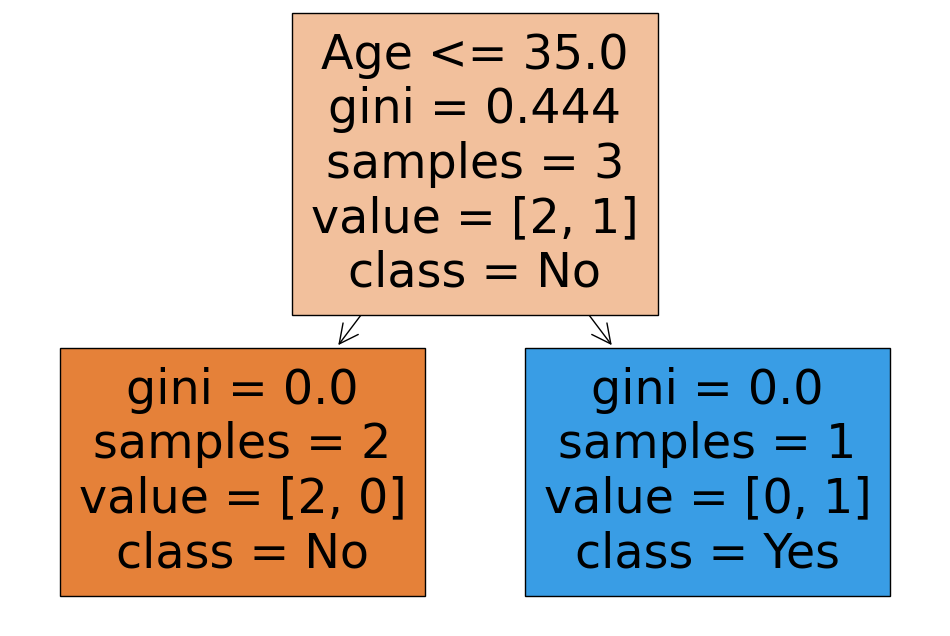

In [34]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [40]:
# predict a model
prediction=model.predict(X_test)
prediction

array([False,  True])

In [46]:
# evaluation performance of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# accuracy of the model
accuracy=accuracy_score(y_test,prediction)
print("accuracy",accuracy)



accuracy 0.5


In [48]:
# detail matric
print("performance_Report \n",classification_report(y_test,prediction))

performance_Report 
               precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/home/menge/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/menge/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/menge/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
# confussion matrix
print("Confusion matrix \n",confusion_matrix(y_test,prediction))

Confusion matrix 
 [[0 0]
 [1 1]]


### regresion with decision tree algorithm

In [58]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# sample data

data = {
    'Square_Feet': [1500, 1800, 2400, 3000, 3500],
    'Bedrooms': [3, 4, 4, 5, 5],
    'Price': [300000, 360000, 500000, 600000, 650000]
}
data
df=pd.DataFrame(data)
df


,Square_Feet,Bedrooms,Price
0,1500,3,300000
1,1800,4,360000
2,2400,4,500000
3,3000,5,600000
4,3500,5,650000


In [62]:
# features and target variables
X=df[["Square_Feet","Bedrooms"]]
y=df["Price"]
X,y

(   Square_Feet  Bedrooms
 0         1500         3
 1         1800         4
 2         2400         4
 3         3000         5
 4         3500         5,
 0    300000
 1    360000
 2    500000
 3    600000
 4    650000
 Name: Price, dtype: int64)

In [80]:
# split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [82]:
# train data in model
model=DecisionTreeRegressor(max_depth=3,random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [84]:
# make prediction
pred=model.predict(X_test)
print("Prediction price \n",pred)

Prediction price 
 [300000.]


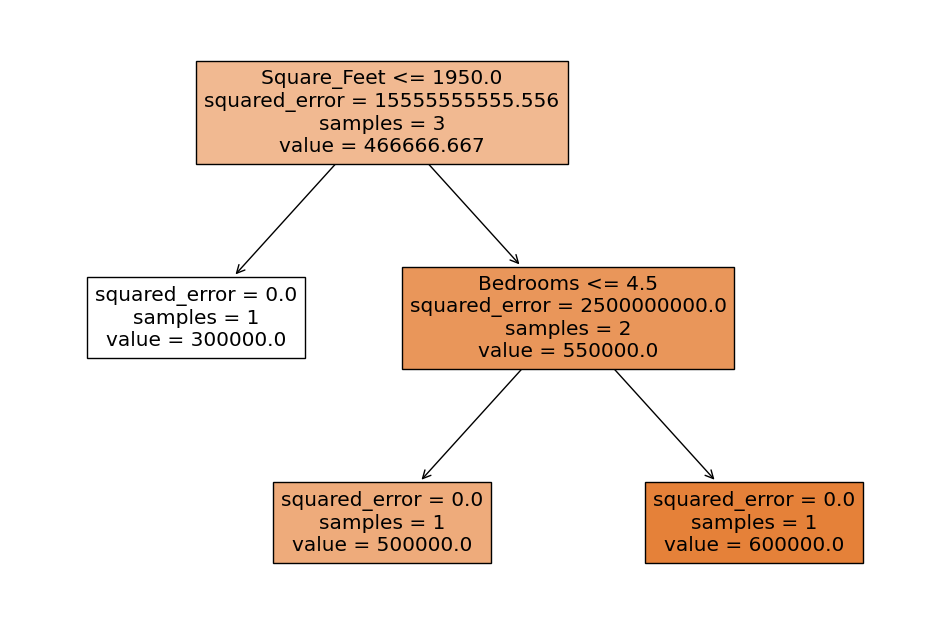

In [76]:
# Visualize the tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [86]:
# evaluation performance of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# accuracy of the model
accuracy=accuracy_score(y_test,pred)
print("accuracy",accuracy)

accuracy 0.0


In [88]:
# detail matric
print("performance_Report \n",classification_report(y_test,pred))

performance_Report 
               precision    recall  f1-score   support

    300000.0       0.00      0.00      0.00       0.0
    360000.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/home/menge/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/menge/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/menge/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/menge/anaconda3/li

In [92]:
# confussion matrix
print("Confusion matrix \n",confusion_matrix(y_test,pred))

Confusion matrix 
 [[0 0]
 [1 0]]
